In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install download

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
from __future__ import absolute_import,division,print_function,unicode_literals

import matplotlib as mpl
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False


In [4]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/kaggle/temp',replace=True, kind="zip")

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:01<00:00, 6.14MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /kaggle/temp


In [5]:

df = pd.read_csv('/kaggle/temp/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**There are list of datasets separating by the station. Here we are considering only the Dingling**

**Here the PM2.5 is the target variable, as it can cause some hazardous problems like asthma, We have to keep that in control in the regions.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**We can able to see that many of the filds are int and float.We have to convert year, month and day field to a field of date type for the purpose of time series analysis**

In [8]:
def conv_to_date(x):
    return datetime.strptime(x,"%Y %m %d %H")

In [9]:
a_df=pd.read_csv("/kaggle/temp/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv",
                 parse_dates=[['year','month','day','hour']],date_parser=conv_to_date,keep_date_col=True)

In [10]:
a_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [11]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

**Successfully converted the all the date fields to a single field of type datetime**

In [12]:
a_df['month']=pd.to_numeric(a_df['month'])

In [13]:
a_df.shape

(35064, 19)

**There are nearly 35K rows and 19 columns or features**

In [14]:
a_df.columns

Index(['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5',
       'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd',
       'WSPM', 'station'],
      dtype='object')

In [15]:
a_df.isnull().any()

year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

In [16]:
print('Unique values:',a_df.nunique())

Unique values: year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10                     554
SO2                      327
NO2                      636
CO                       103
O3                       792
TEMP                     998
PRES                     593
DEWP                     602
RAIN                     116
wd                        16
WSPM                      95
station                    1
dtype: int64


In [17]:
a_df.describe()

,No,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,6.522930,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,3.448752,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,4.000000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,7.000000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,10.000000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,12.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


# Indexing the data

**It will be faster to query the data when indexing and for other filtering and plotting purpose for time series data**

In [18]:
df_nonindexed=a_df.copy()

In [19]:
a_df=a_df.set_index('year_month_day_hour')

In [20]:
a_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [21]:
a_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [22]:
a_df.loc['2013-03-01':'2013-03-05']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-05 19:00:00,116,2013,3,5,19,179.0,200.0,50.0,96.0,1600.0,82.0,7.7,1005.4,-7.6,0.0,NNE,0.2,Dingling
2013-03-05 20:00:00,117,2013,3,5,20,172.0,180.0,43.0,94.0,1899.0,82.0,6.3,1005.9,-7.3,0.0,NNE,0.7,Dingling
2013-03-05 21:00:00,118,2013,3,5,21,179.0,191.0,38.0,80.0,1700.0,82.0,5.6,1006.0,-7.3,0.0,NNE,0.2,Dingling


In [23]:
a_df.loc['2013':'2014']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,16100,2014,12,31,19,7.0,37.0,2.0,2.0,300.0,69.0,-2.3,1015.0,-24.8,0.0,NW,2.2,Dingling
2014-12-31 20:00:00,16101,2014,12,31,20,NaN,NaN,NaN,NaN,NaN,NaN,-2.5,1014.0,-24.3,0.0,NNW,2.3,Dingling
2014-12-31 21:00:00,16102,2014,12,31,21,NaN,NaN,NaN,NaN,NaN,NaN,-3.1,1012.0,-23.5,0.0,NW,1.4,Dingling


In [24]:
pm_data=a_df['PM2.5']

In [25]:
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

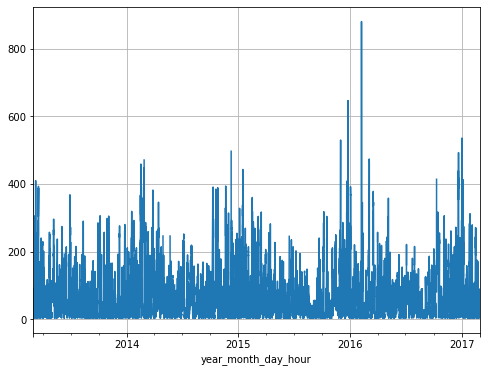

In [26]:
pm_data.plot(grid=True)

**Plot only the values for the year 2015**

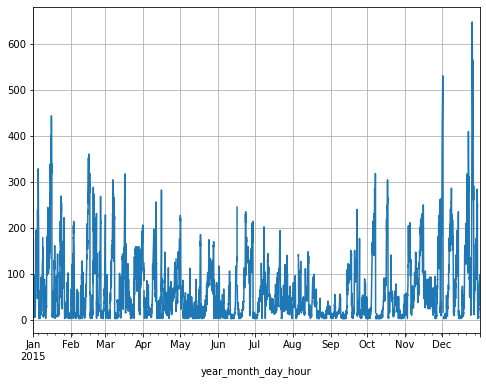

In [27]:
a_df_15=a_df.loc['2015']
pm_15=a_df_15['PM2.5']
pm_15.plot(grid=True)

**We can see that from Jan the value is decreasing and after oct it is gradually increasing**

**Doing the same for 2016**

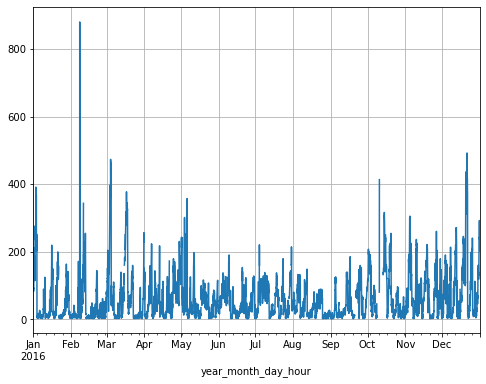

In [28]:
a_df_15=a_df.loc['2016']
pm_15=a_df_15['PM2.5']
pm_15.plot(grid=True)

**The pattern is almost similar to the above**

In [29]:
import plotly.express as px

In [30]:
fig = px.line(df_nonindexed,x='year_month_day_hour',y='PM2.5',title='PM 2.5 with slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [31]:
fig = px.line(df_nonindexed,x='year_month_day_hour',y='PM2.5',title='PM 2.5 with slider')

fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1y',step='year',stepmode = "backward"),
                        dict(count = 2,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 3,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        ))
fig.show()

**Using this we can able to see the specified range of years within the frame**

Text(0.5, 1.0, 'Air qulaity 2014 and 2015')

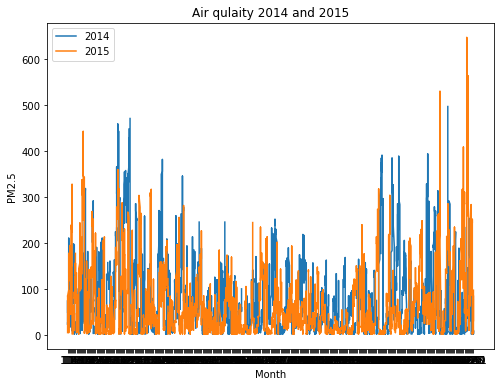

In [33]:
df_14=a_df['2014'].reset_index()
df_15=a_df['2015'].reset_index()

df_14['month_day_hour']=df_14.apply(lambda x: str(x['month'])+"."+x['day'],axis=1)
df_15['month_day_hour']=df_15.apply(lambda x: str(x['month'])+"."+x['day'],axis=1)

plt.plot(df_14['month_day_hour'],df_14['PM2.5'])
plt.plot(df_15['month_day_hour'],df_15['PM2.5'])

plt.legend(['2014','2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')

plt.title('Air qulaity 2014 and 2015')

In [34]:
df_14.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,month_day_hour
0,2014-01-01 00:00:00,7345,2014,1,1,0,27.0,104.0,12.0,9.0,NaN,NaN,6.8,1003.7,-15.9,0.0,WSW,5.2,Dingling,1.1
1,2014-01-01 01:00:00,7346,2014,1,1,1,25.0,86.0,12.0,9.0,500.0,63.0,6.5,1003.6,-16.2,0.0,W,3.6,Dingling,1.1
2,2014-01-01 02:00:00,7347,2014,1,1,2,27.0,85.0,14.0,9.0,400.0,63.0,6.4,1003.4,-15.6,0.0,WNW,5.3,Dingling,1.1
3,2014-01-01 03:00:00,7348,2014,1,1,3,34.0,98.0,19.0,15.0,400.0,56.0,6.2,1002.9,-15.8,0.0,WNW,4.7,Dingling,1.1
4,2014-01-01 04:00:00,7349,2014,1,1,4,32.0,102.0,18.0,15.0,400.0,33.0,6.1,1002.7,-15.2,0.0,W,3.5,Dingling,1.1


In [36]:
a_df['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [38]:
a_df['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['min','max'],'TEMP':['min','max']})

PM2.5         TEMP      
        min    max   min   max
month                         
1       3.0  443.0 -16.6  12.4
2       3.0  881.0 -10.9  14.0
3       3.0  474.0  -6.4  26.0
4       3.0  346.0   1.3  32.0
5       3.0  358.0   7.0  41.4
6       3.0  245.0  15.1  38.1
7       3.0  252.0  16.8  39.2
8       3.0  217.0  16.6  36.3
9       3.0  240.0   7.8  34.5
10      3.0  414.0  -1.4  28.1
11      3.0  394.0 -10.3  20.8
12      3.0  647.0  -9.7  11.6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f326e94fad0>,
      dtype=object)

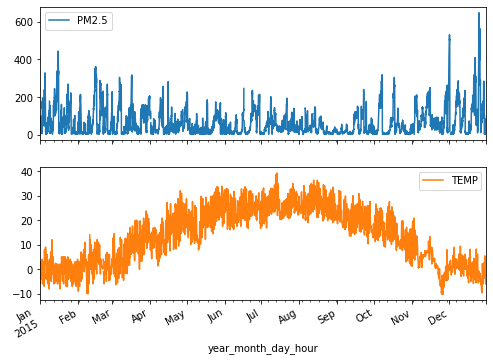

In [41]:
df_15=a_df['2015']
a_df_15=df_15[['PM2.5','TEMP']]
a_df_15.plot(subplots=True)

**From the plots, we obser that when the temperature decreases, the PM2.5 value increases and they are indirectly proportional**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f326e4073d0>,
      dtype=object)

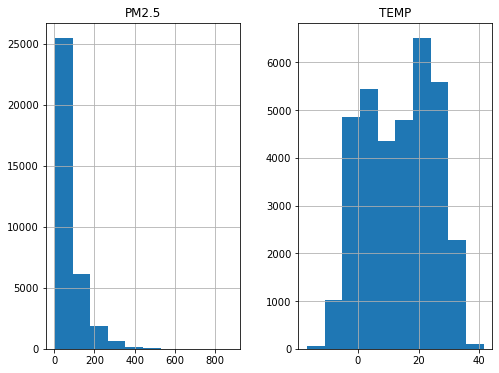

In [42]:
a_df[['PM2.5','TEMP']].hist()

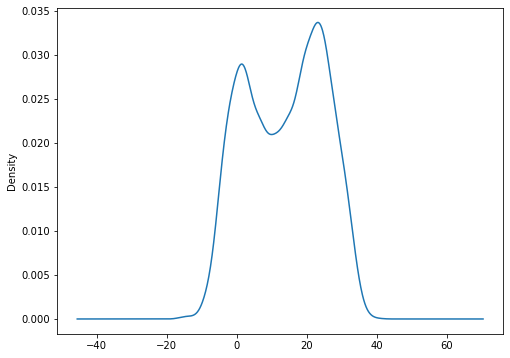

In [43]:
a_df['TEMP'].plot(kind='density')

# Lag plot 

**It is a kind of scatter plot, where the data is kind of lag between two or more values**

**As the data is hourly basis, we have to specify the no of hours in the lag value**

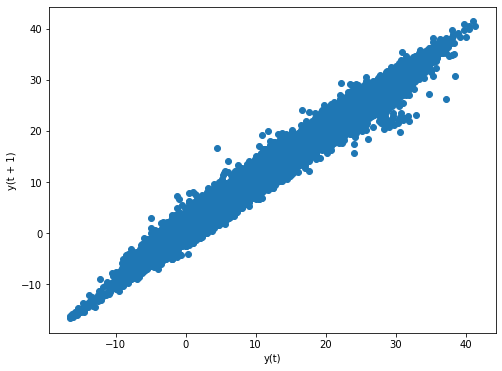

In [45]:
pd.plotting.lag_plot(a_df['TEMP'],lag=1)

**We can see that most of the day are correlated**

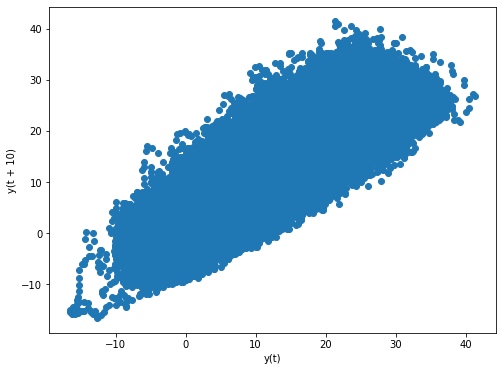

In [46]:
pd.plotting.lag_plot(a_df['TEMP'],lag=10)

**It is not so linear than the previous one**

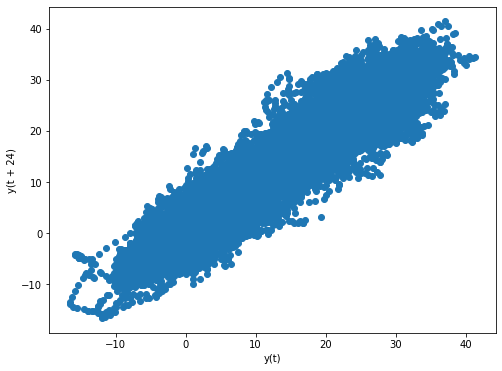

In [47]:
pd.plotting.lag_plot(a_df['TEMP'],lag=24)

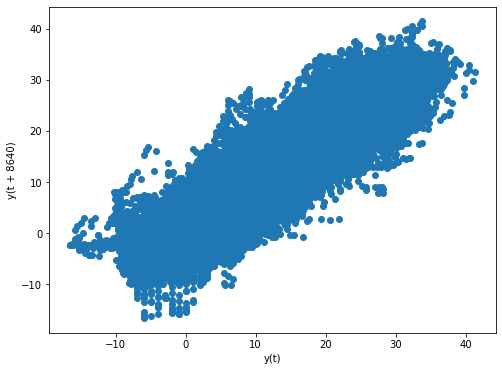

In [48]:
pd.plotting.lag_plot(a_df['TEMP'],lag=8640)

**8640 hour = 1 year**

**So we can say that each year is positively correlated with the previous one**

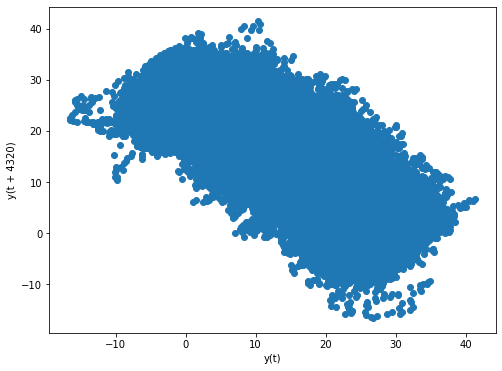

In [49]:
pd.plotting.lag_plot(a_df['TEMP'],lag=4320)

**4320 hour = 6 months**

**As we can see that the data is negativley correlated for every 6 months**

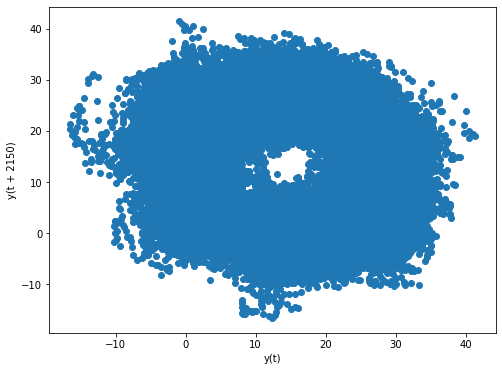

In [50]:
pd.plotting.lag_plot(a_df['TEMP'],lag=2150)

**2150 hour = 3 months, and plot depicts that there is no correlattion at all**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f326d873ed0>,
      dtype=object)

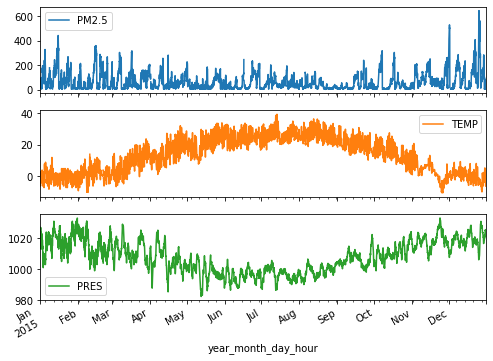

In [52]:
a_df_15 = a_df['2015']
pm_data_2015 = a_df_15[['PM2.5','TEMP','PRES']]
pm_data_2015.plot(subplots = True)

**Temp and pressure are negatively correlated**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f326d8738d0>,
      dtype=object)

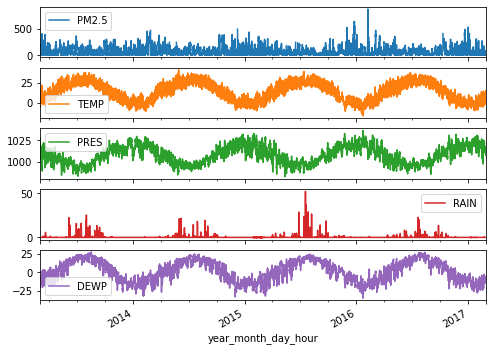

In [53]:
multi_data = a_df[['PM2.5','TEMP','PRES','RAIN','DEWP']]
multi_data.plot(subplots = True)

**Pressure and Pm2.5 are highly correlated**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f326d87b350>,
      dtype=object)

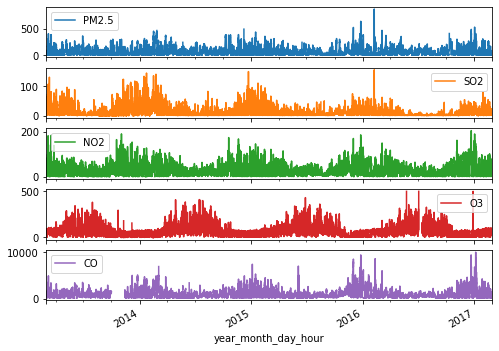

In [55]:
multi_data = a_df[['PM2.5','SO2','NO2','O3','CO']]
multi_data.plot(subplots = True)

**PM2.5 and co are higly correlated**

Text(0.5, 0, 'year_month_day_hour')

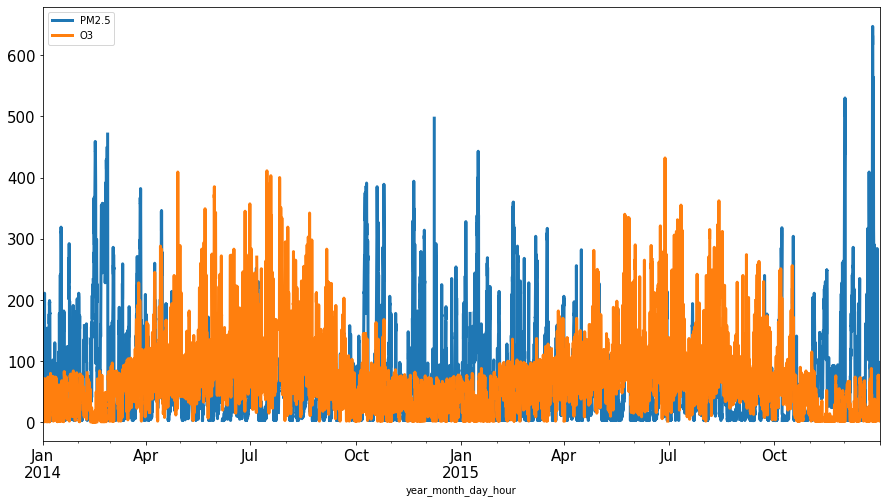

In [56]:
a_df['2014':'2015'][['PM2.5','O3']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.xlabel('year_month_day_hour')

**PM2.5 is high during the winter mostly and O3 is high during the summer**

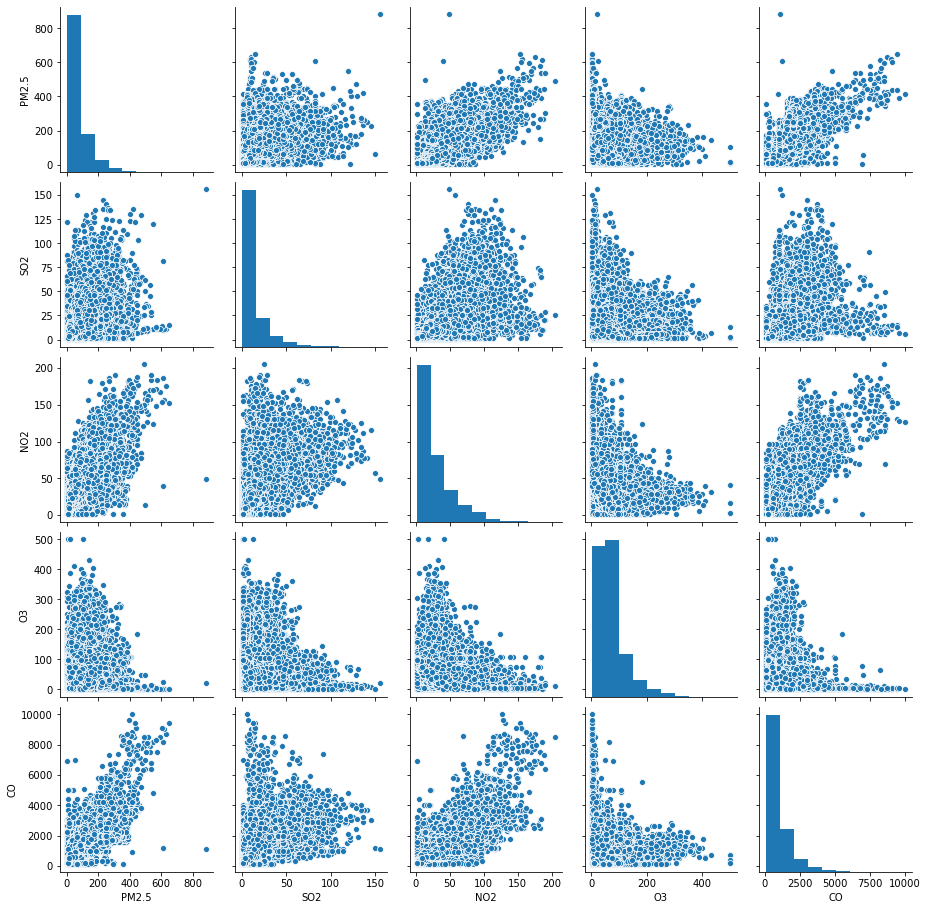

In [58]:
g = sns.pairplot(a_df[['PM2.5','SO2','NO2','O3','CO']])

**Co is positively correlated with PM2.5**

In [60]:
aq_corr = a_df[['PM2.5','SO2','NO2','O3','CO']].corr(method = 'pearson')
aq_corr

,PM2.5,SO2,NO2,O3,CO
PM2.5,1.000000,0.475117,0.718170,-0.100542,0.802737
SO2,0.475117,1.000000,0.610433,-0.182096,0.529182
NO2,0.718170,0.610433,1.000000,-0.373625,0.798753
O3,-0.100542,-0.182096,-0.373625,1.000000,-0.303275
CO,0.802737,0.529182,0.798753,-0.303275,1.000000


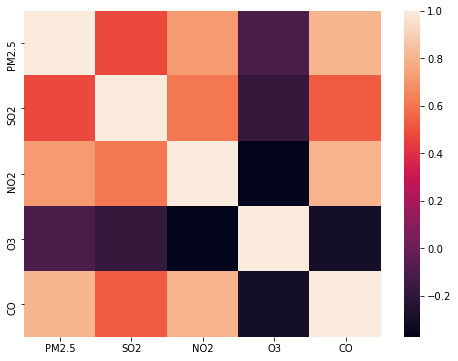

In [61]:
import seaborn as sns

sns.heatmap(aq_corr)

In [62]:
a_df.groupby('wd').agg(median=('PM2.5','median'),mean=('PM2.5','mean'),max=('PM2.5','max'),min=('PM2.5','min')).reset_index()

,wd,median,mean,max,min
0,E,70.0,88.623363,434.0,3.0
1,ENE,56.5,77.685514,647.0,3.0
2,ESE,78.5,96.492276,632.0,3.0
3,N,29.0,57.546221,536.0,3.0
4,NE,32.0,57.390083,530.0,3.0
5,NNE,26.0,53.946239,881.0,3.0
6,NNW,33.0,62.790775,548.0,3.0
7,NW,21.0,52.769116,535.0,3.0
8,S,52.0,72.497281,511.0,3.0
9,SE,70.0,85.045709,617.0,3.0


# Auto correlation plot

In [63]:
a_dna= a_df.copy()

a_dna=a_dna.dropna()

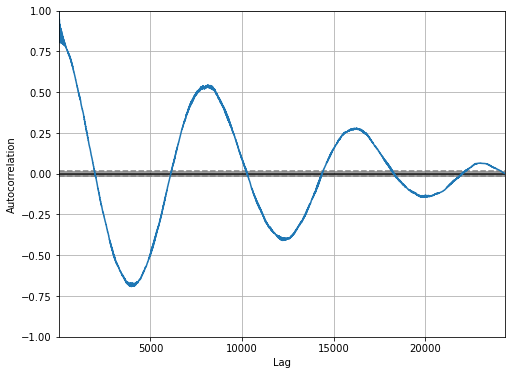

In [65]:
pd.plotting.autocorrelation_plot(a_dna['2014':'2016']['TEMP'])

**It is observed that the data is positive at every one year that is 8310 hours = 1 year and next at 16K**

In [66]:
a_dna['TEMP'].resample('1m').mean() # as the data is hourly basis, resampling into monthly basis

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

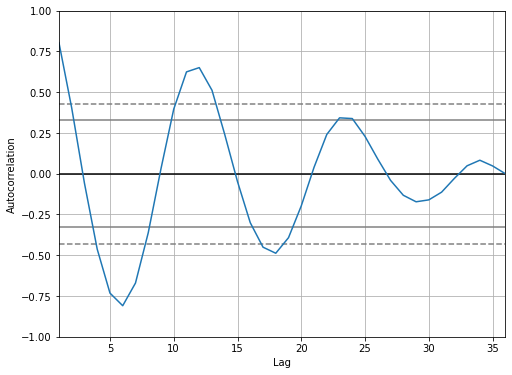

In [67]:
pd.plotting.autocorrelation_plot(a_dna['2014':'2016']['TEMP'].resample('1m').mean())

**The plot is same as the before, it increases as every 12 months = 1 year**

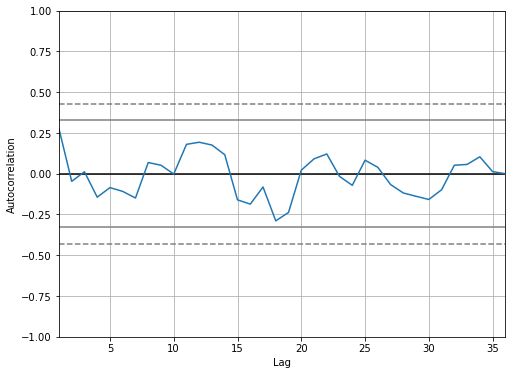

In [69]:
pd.plotting.autocorrelation_plot(a_dna['2014':'2016']['PM2.5'].resample('1m').mean())